<a href="https://colab.research.google.com/github/alfred1224-al/ML-House-price-prediction-project/blob/main/California_House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **California Housing Price prediction**

**Team members:**



*   ANTHONY CRUZ Alfred Abishek
*   BHATTARAI Govinda



**Dataset Overview: California Housing Prices**

Source: https://www.kaggle.com/datasets/camnugent/california-housing-prices

**Description**:
This dataset contains information collected from the 1990 California census. It is widely used for learning the basics of machine learning and is the specific dataset used in the second chapter of Aurélien Géron's best-selling book, "Hands-On Machine Learning with Scikit-Learn and TensorFlow."

The data pertains to the houses found in a given California district and some summary stats about them. It serves as an excellent introduction to implementing machine learning algorithms (specifically regression tasks) because it requires rudimentary data cleaning, has an easily understandable list of variables, and sits at an optimal size between being too toy-ish and too cumbersome.

**Content**

The dataset consists of 20,640 rows and 10 columns. Each row represents a census block group (often called a "district").

**Target Variable**

median_house_value: This is the target variable usually used for regression tasks (predicting the price of a house).

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

# 1. Data Loading
In this step, we download the California Housing dataset directly from Kaggle using the `kagglehub` library. This ensures we always have the latest version of the data. We then load it into a Pandas DataFrame (`df1`) to begin our analysis.

In [3]:
path = kagglehub.dataset_download("camnugent/california-housing-prices")
print("Path to dataset files:", path)

# Read the CSV file from the downloaded path into a Pandas DataFrame
df1 = pd.read_csv(f"{path}/housing.csv")
# Displays the dataset
df1

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df1.shape

(20640, 10)

# 2. Preprocessing & Data Transformation
In this step, we perform crucial data cleaning and feature transformation:
1.  **Handle Missing Values:** We fill missing entries in `total_bedrooms` with the median value to maintain data integrity.
2.  **Outlier Detection:** We visualize the data using Boxplots to identify extreme values (outliers).
3.  **Log Transformation:** Real-world housing data (like prices and population) is often "right-skewed" (long tail of high values). We apply a **Log Transformation (`log1p`)** to compress these outliers and make the data distribution more "normal" (Gaussian). This significantly helps regression models learn better patterns.
4.  **Before vs. After Comparison:** We plot Histograms and Boxplots to visually confirm that the skewness has been reduced.

In [7]:
df1.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


### 2.1 Handle Missing Values (Median Imputation)


In [8]:
# Fill missing values in 'total_bedrooms' with the median value
# We use the median because it is robust to outliers compared to the mean
df1['total_bedrooms'] = df1['total_bedrooms'].fillna(df1['total_bedrooms'].median())


In [9]:
# Verify that missing values are gone
df1.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


# 2.2 Detect Outliers

#### Using Boxplots (for visualization)

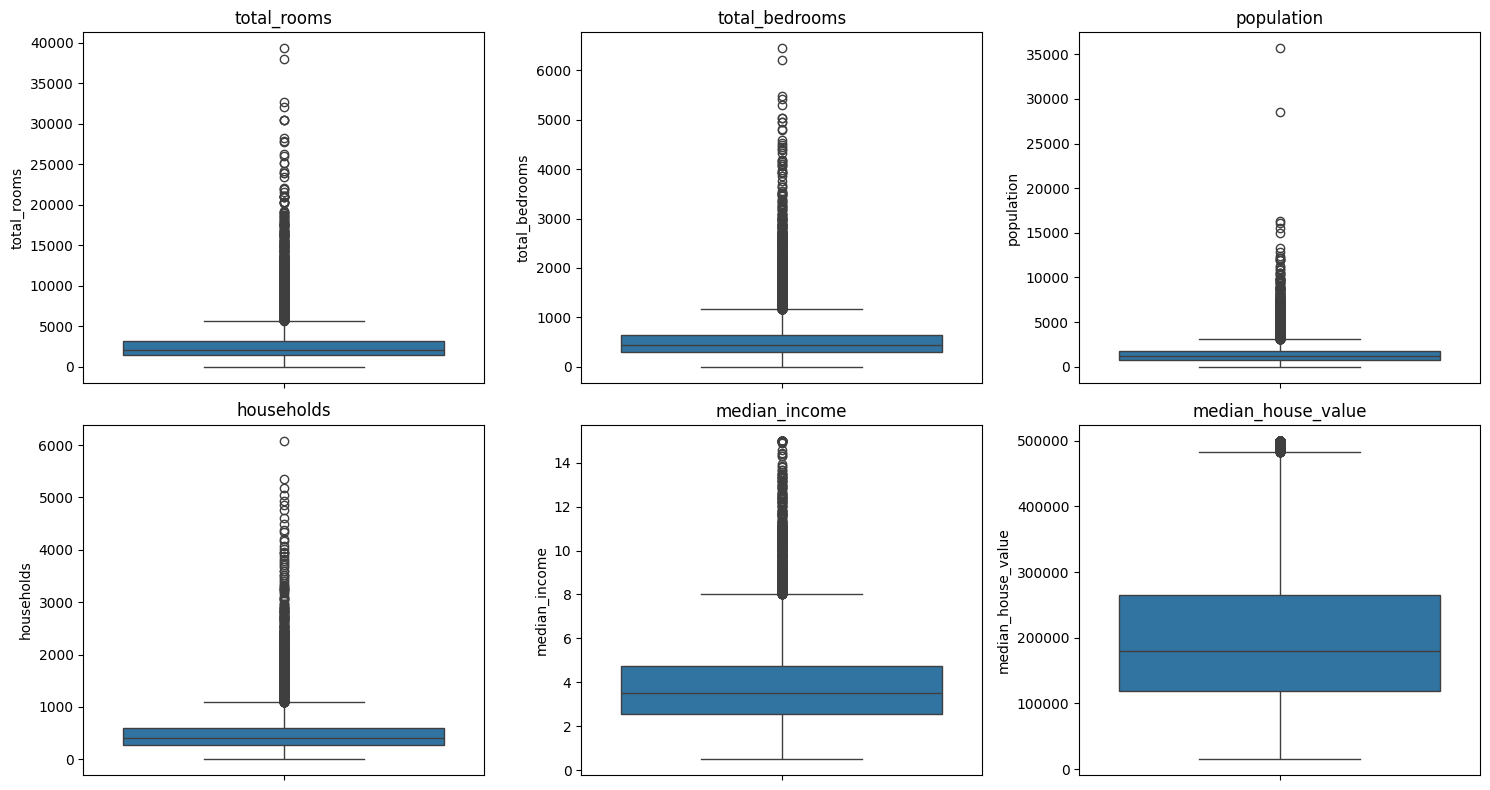

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to inspect
numeric_columns = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Plot boxplots to visualize outliers in the raw data
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# 2.3 Apply log Transformation and Visualization to show the Before and After

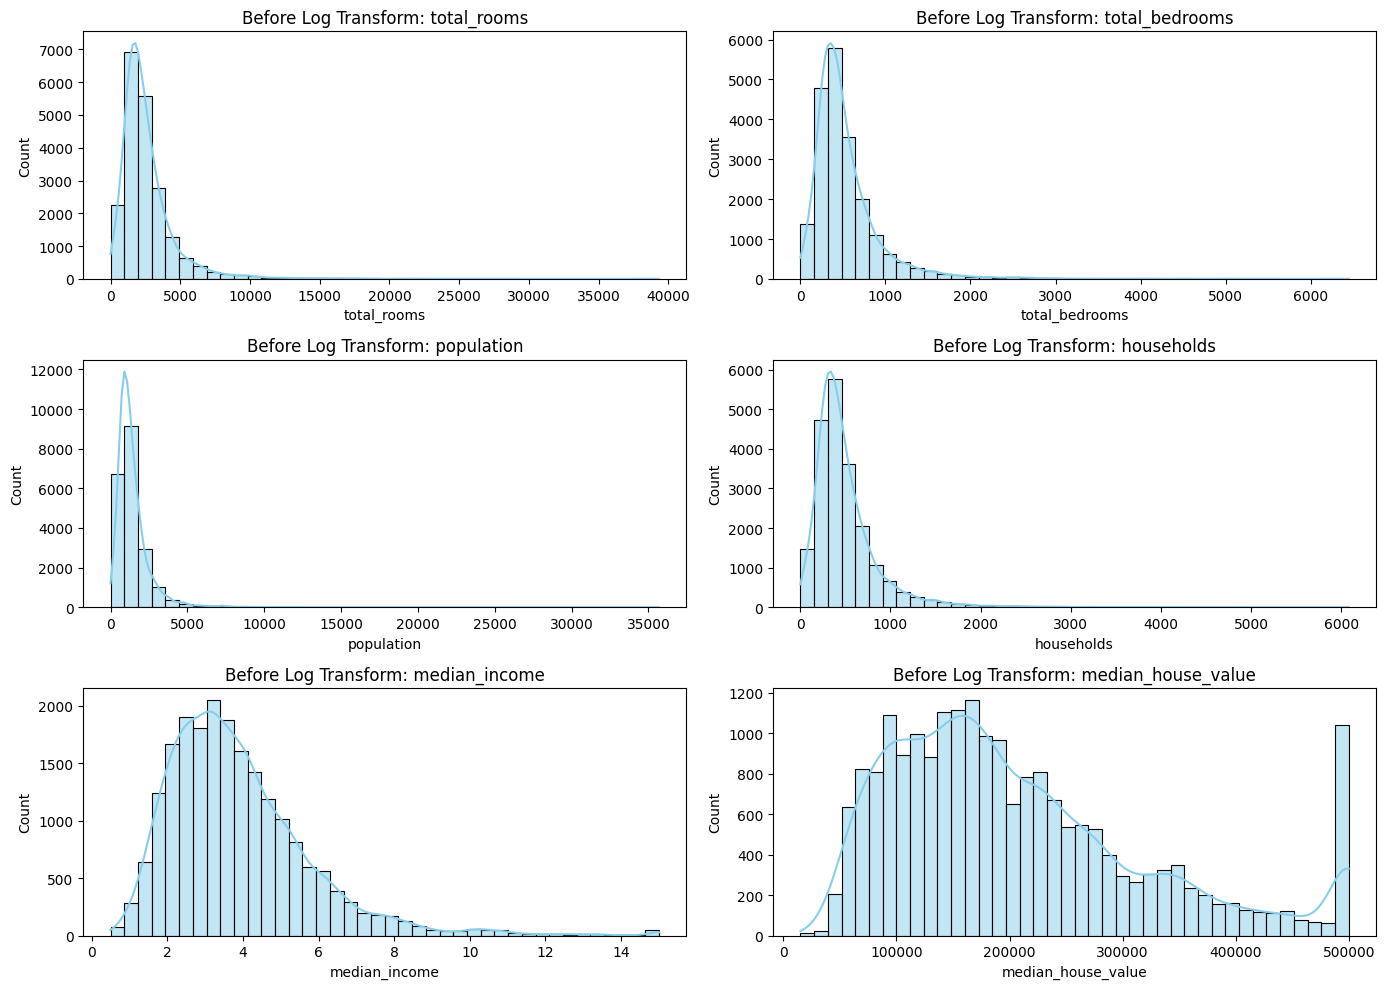

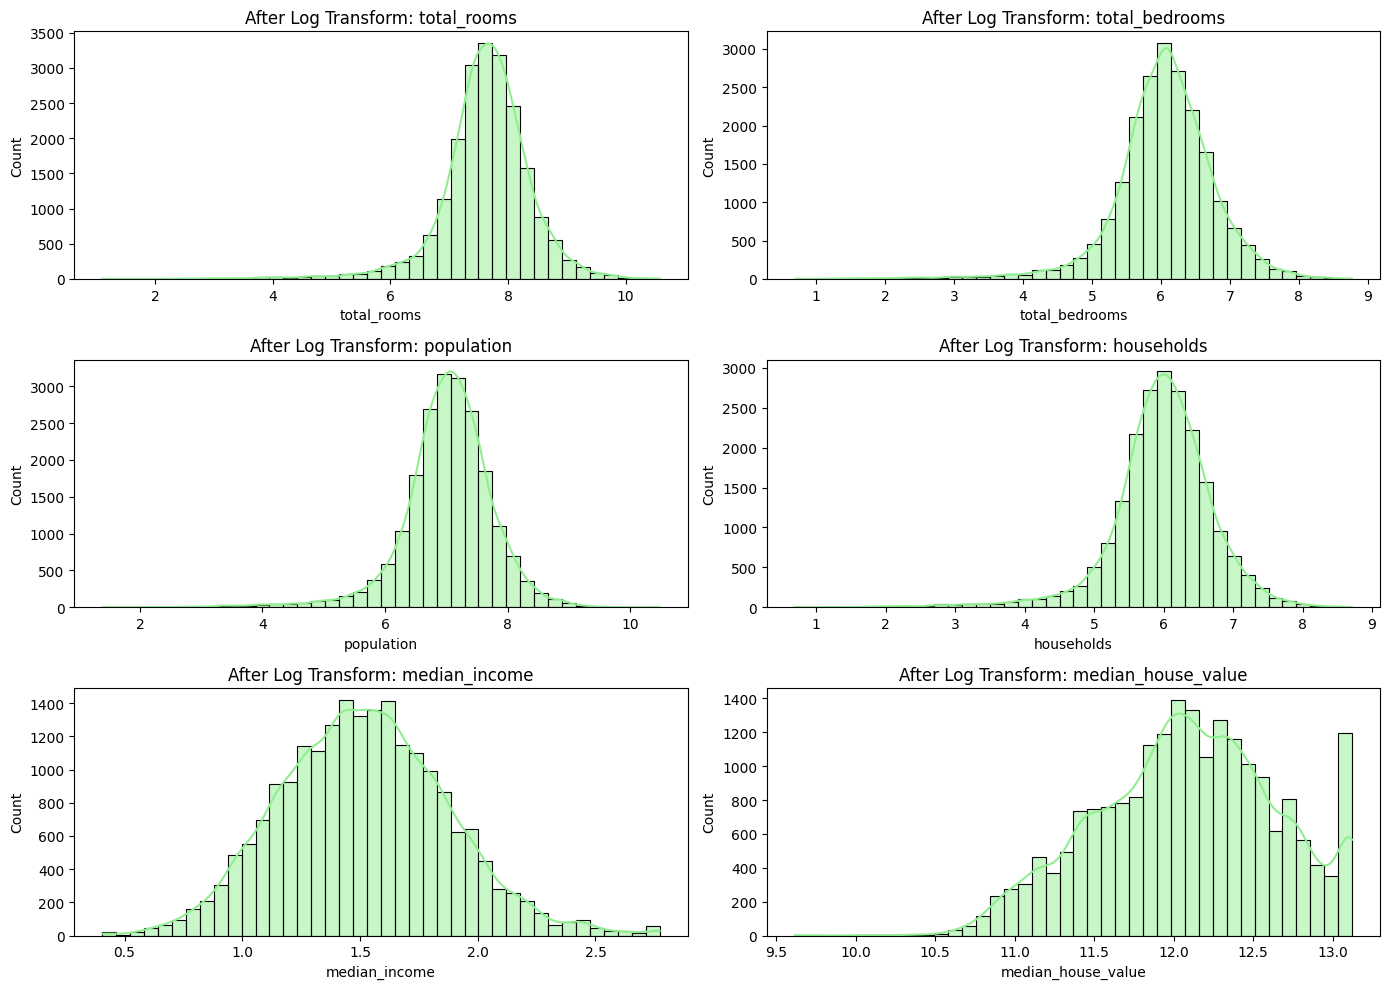

In [11]:
# Create a temporary copy to apply transformations
df_log = df1.copy()

# Select skewed numeric columns (you can adjust if needed)
cols_to_log = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Apply log(1 + x) transformation
# np.log1p is used instead of np.log to avoid errors if the value is 0

for col in cols_to_log:
    df_log[col] = np.log1p(df_log[col])  # avoids issues if any 0 values exist

# Compare before vs after using histograms
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_to_log, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df1[col], bins=40, color='skyblue', kde=True)
    plt.title(f"Before Log Transform: {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_to_log, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_log[col], bins=40, color='lightgreen', kde=True)
    plt.title(f"After Log Transform: {col}")
plt.tight_layout()
plt.show()

# Visualization: Box Plot Comparison

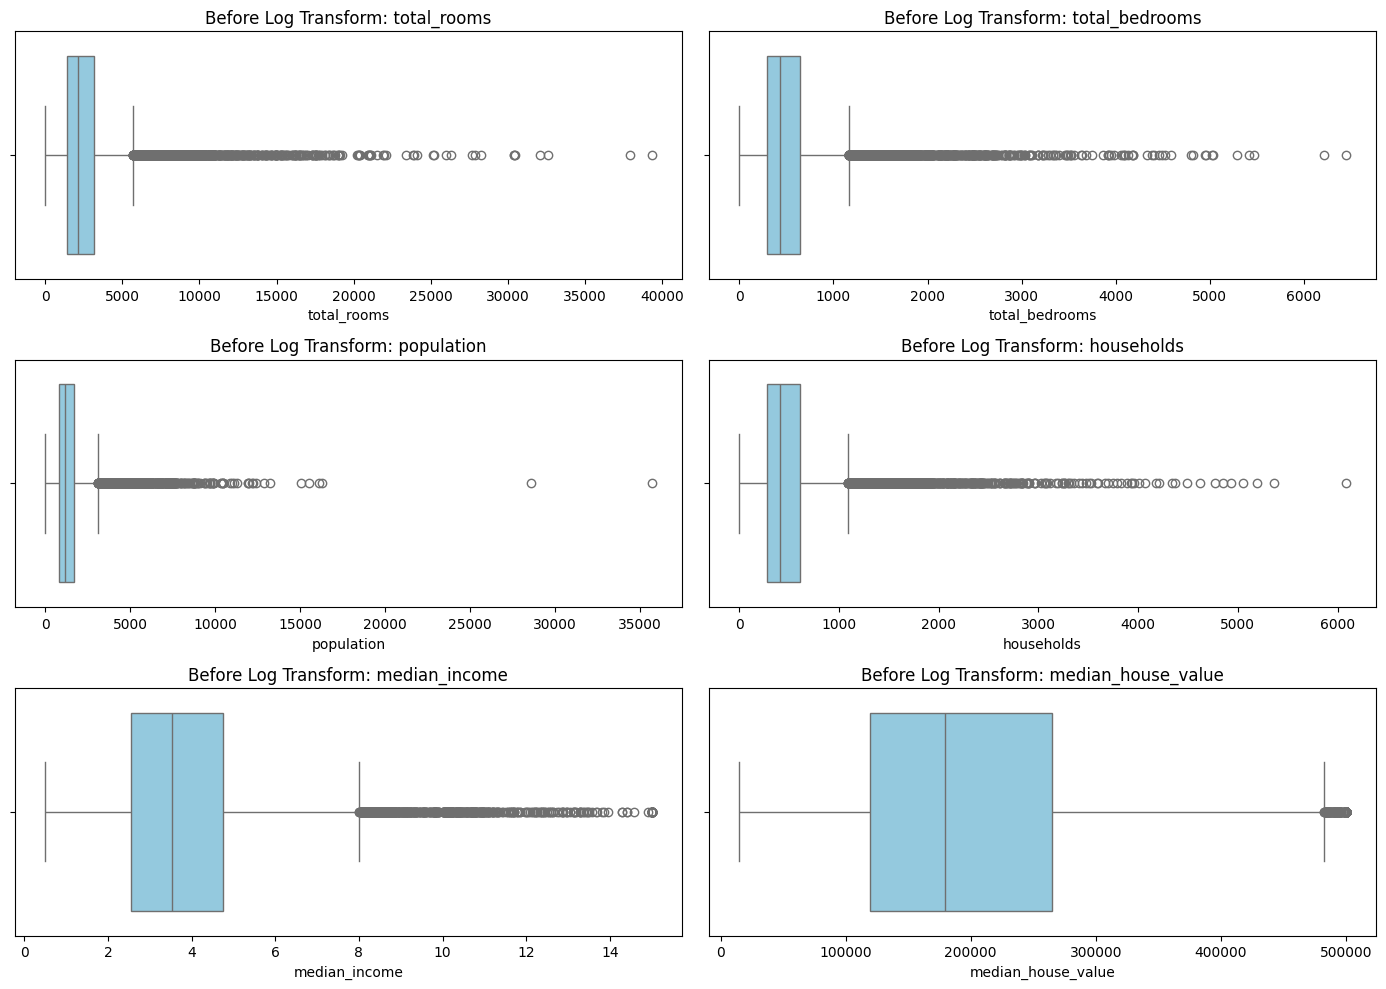

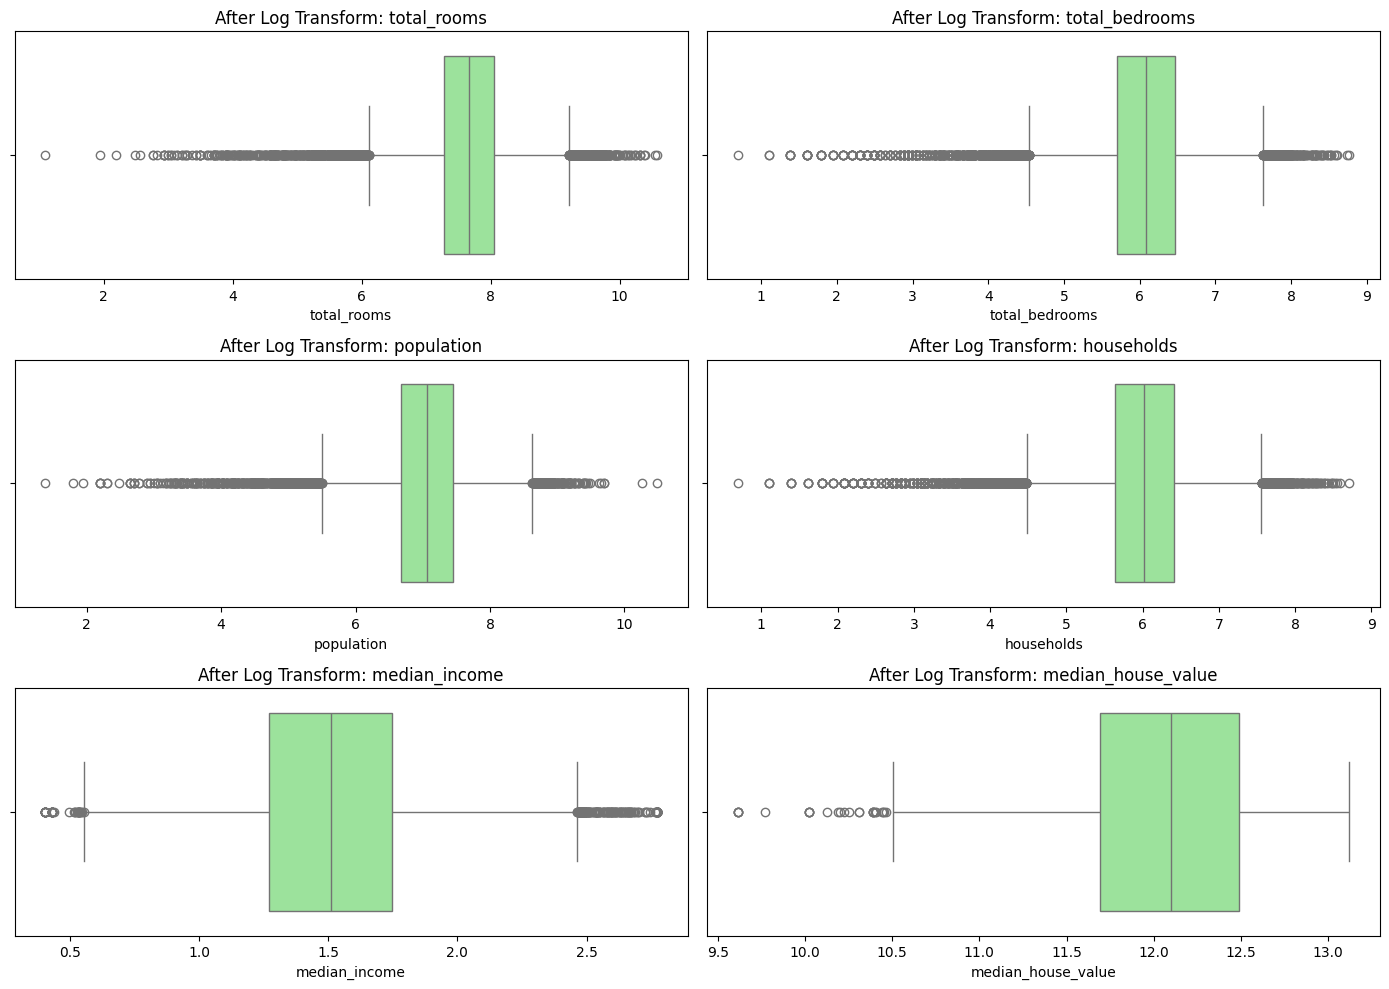

In [12]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_to_log, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df1[col], color='skyblue')
    plt.title(f"Before Log Transform: {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_to_log, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_log[col], color='lightgreen')
    plt.title(f"After Log Transform: {col}")
plt.tight_layout()
plt.show()

In [13]:

# Overwrite the original dataframe with the transformed data
df1 = df_log.copy()


# 3. Feature Engineering & Correlation Analysis

In this step, we enhance the dataset to improve model performance:
1.  **One-Hot Encoding:** We convert the categorical `ocean_proximity` column into numeric binary columns (e.g., `ocean_proximity_INLAND`) so the model can understand location data.
2.  **Feature Creation (Log-Ratios):** We create new features like "Rooms per Household".
    * *Note:* Since our data is **Log-Transformed** from the previous step, we calculate ratios by **subtracting** the columns instead of dividing.
    * Math Rule: $\log(A) - \log(B) = \log(\frac{A}{B})$.
3.  **Correlation Analysis:** We generate a Heatmap and Bar Chart to see which features are most strongly related to the House Price. This helps us understand what drives the market value.

# 3.1 One-Hot Encoding

In [14]:
# Convert 'ocean_proximity' (text) into numeric columns (0 or 1)
# drop_first=True removes one column to reduce redundancy (multicollinearity)
if 'ocean_proximity' in df1.columns:
    df1 = pd.get_dummies(df1, columns=['ocean_proximity'], drop_first=True)
    print("One-Hot Encoding applied.")

One-Hot Encoding applied.


# 3.2 Create features

Since data is Log-Transformed, we use Subtraction to get Ratios: Log(A/B) = Log(A) - Log(B)

In [15]:
# Rooms per Household (measures unit size)
df1['rooms_per_household'] = df1['total_rooms'] / df1['households']
# Bedrooms per Room (measures luxury/bed count vs living space)
df1['bedrooms_per_room'] = df1['total_bedrooms'] / df1['total_rooms']
# Population per Household (measures crowding)
df1['population_per_household'] = df1['population'] / df1['households']

In [16]:
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [17]:
df1.corr()['median_house_value'].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.681271
total_rooms,0.186376
ocean_proximity_NEAR BAY,0.161540
ocean_proximity_NEAR OCEAN,0.144810
households,0.113635
total_bedrooms,0.087238
housing_median_age,0.076007
rooms_per_household,0.071184
population,0.026385


# 3.3 Correlation Analysis

In [18]:
# sort correlations with the Target Variable ('median_house_value')
# We look for high absolute values (close to 1 or -1)
corr_matrix = df1.corr()
# Focus only on correlations with the target variable
corr_target = corr_matrix['median_house_value'].sort_values(ascending=False)

# 3.4 Visualization

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.029337 -0.032319           -0.315216   
total_bedrooms               0.060528 -0.067937           -0.270861   
population                   0.109029 -0.136460           -0.244264   
households                   0.055261 -0.087937           -0.242896   
median_income               -0.015596 -0.085641           -0.138308   
median_house_value          -0.023209 -0.192596            0.076007   
ocean_proximity_INLAND      -0.055575  0.351166           -0.236645   
ocean_proximity_ISLAND       0.009446 -0.016572            0.017020   
ocean_proximity_NEAR BAY    -0.474489  0.358771            0.255172   
ocean_proximity_NEAR OCEAN   0.045509 -0.160818            0.021622   
rooms_

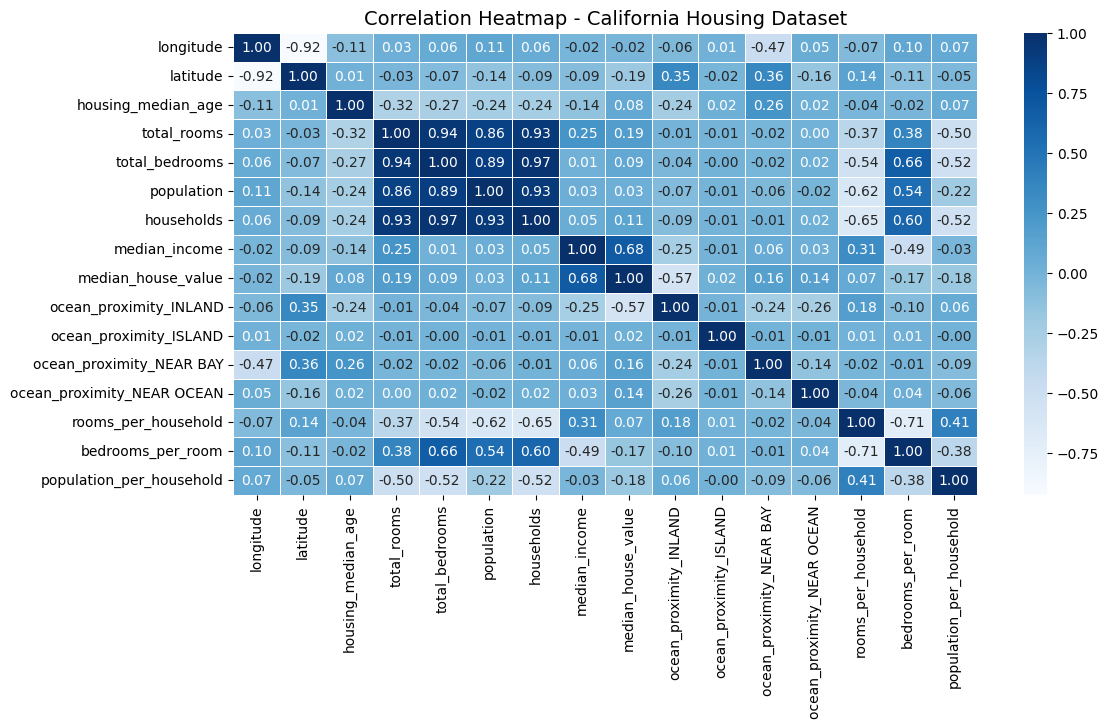

In [19]:
# A. HEATMAP
# Shows the correlation between EVERY pair of variables
print(corr_matrix)
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap - California Housing Dataset", fontsize=14)
plt.show()


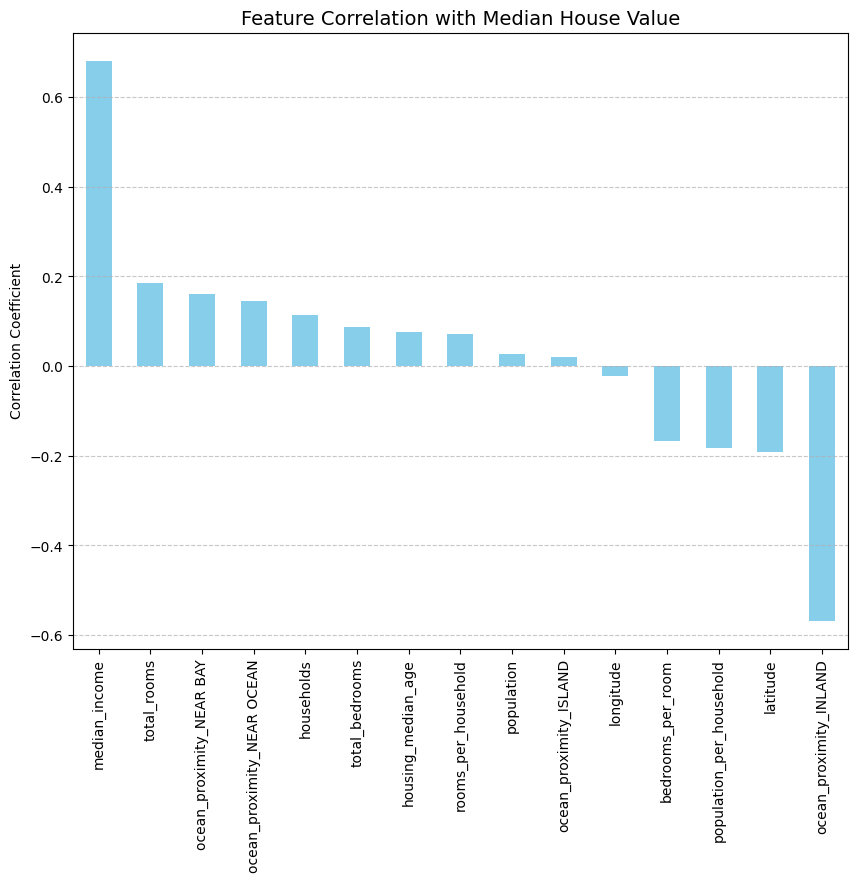

In [20]:
# B. BAR CHART
# Shows specific correlation of each feature with the House Price
# Use the 'corr' variable already computed and drop the target itself for plotting
plt.figure(figsize=(10, 8))
corr_target.drop('median_house_value').plot(kind='bar', color='skyblue')
plt.title("Feature Correlation with Median House Value", fontsize=14)
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Feature Selection & Data Splitting
In this step, we prepare the data for training:

1.  **Correlation Analysis:** We check which features correlate most strongly with the *Log Price*. This is more accurate than checking against the raw price because the model minimizes error in "log space."
2.  **Define X and y:**
    * **X:** All predictive features (cleaned of target variables).
    * **y:** The **Log Price** (`median_house_value`).
3.  **Train-Test Split:** We split the dataset (80% Train, 20% Test).

### Select Top Features

In [21]:
top_features = [
    'median_income',
    'bedrooms_per_room',
    'rooms_per_household',
    'latitude',
    'longitude',
    'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN'
]

target = 'median_house_value_log'


In [22]:
# Use 'median_house_value' for correlation since it's the target name.
# Select top features with absolute correlation > 0.10
corr = df1.corr()['median_house_value'].abs().sort_values(ascending=False)


selected_features = df1.columns.tolist()
selected_features.remove('median_house_value')



### Create Feature and Target Sets

In [23]:
# Ensure selected_features is defined for this cell's execution.
# This assumes df1 has already been prepared with feature engineering and one-hot encoding,
# and 'median_house_value' has been renamed to 'median_house_value_log' in a prior step.
X = df1[selected_features]
y = df1['median_house_value']


### Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Train and Compare 4 models

# Model Training and Comparison

In this section, we will train and evaluate six different regression models to determine which one performs best on the California Housing dataset.

We will evaluate the following algorithms:

Linear Regression: A simple baseline model.

Decision Tree Regressor: A model that learns non-linear relationships.

Random Forest Regressor: An ensemble method that averages multiple decision trees to reduce overfitting.

Gradient Boosting Regressor: An ensemble technique that builds trees sequentially to correct errors.

XGBRegressor (XGBoost): An optimized implementation of gradient boosting known for speed and performance.

LGBMRegressor (LightGBM): A highly efficient gradient boosting framework that uses tree-based learning algorithms.


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(name, model, X_test, y_test, results):
    # Predict log values
    y_pred_log = model.predict(X_test)

    # Reverse transform (back to original dollar scale)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # R2 on original scale
    r2 = r2_score(y_true, y_pred)

    results[name] = {
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse
    }


In [26]:
# Initialize
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
lgbm = lgb.LGBMRegressor(random_state=42)

# Fit them
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

results = {}
evaluate_model("Linear Regression", lr, X_test, y_test, results)
evaluate_model("Decision Tree", dt, X_test, y_test, results)
evaluate_model("Random Forest", rf, X_test, y_test, results)
evaluate_model("Gradient Boosting", gb, X_test, y_test, results)
evaluate_model("XGBoost", xgb, X_test, y_test, results)
evaluate_model("LightGBM", lgbm, X_test, y_test, results)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2609
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 14
[LightGBM] [Info] Start training from score 12.086501


Since we applied a log-transformation to the target variable (median_house_value) during preprocessing to handle skewness, we must reverse this transformation during evaluation.

**Prediction:** We predict the log-values.

Transformation: We use np.expm1() to convert predictions back to the original dollar scale.

**Metrics:**

RMSE (Root Mean Squared Error): Penalizes large errors heavily; useful for housing prices.

MAE (Mean Absolute Error): The average magnitude of errors in dollars.

R² Score: Explains the variance in the data (closer to 1.0 is better).

# Hyperparameter Tuning (Grid Search)

Now that we have identified our top performing algorithms, we will optimize them using **GridSearchCV**.

We will tune the following models:
1. **Random Forest**: Adjusting the number of trees and split criteria.
2. **XGBoost**: Tuning learning rate and tree depth.
3. **LightGBM**: Tuning estimators and depth for efficiency.

*Note: We utilize `n_jobs=-1` to parallelize the search and speed up computation.*

### Random Forest Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params,
                       cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_


### XGBoost Tuning

In [28]:
xgb_params = {
    "n_estimators": [200, 400],
    "learning_rate": [0.05, 0.1],
    "max_depth": [4, 6]
}

xgb_grid = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42),
                        xgb_params, cv=3, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_


### LightGBM Tuning

In [29]:
lgb_params = {
    "n_estimators": [200, 400],
    "learning_rate": [0.05, 0.1],
    "max_depth": [4, 6, -1]
}

lgb_grid = GridSearchCV(lgb.LGBMRegressor(random_state=42),
                        lgb_params, cv=3, scoring='r2', n_jobs=-1)
lgb_grid.fit(X_train, y_train)

best_lgb = lgb_grid.best_estimator_


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2609
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 14
[LightGBM] [Info] Start training from score 12.086501


# Stacking Ensemble

To squeeze out maximum performance, we will use a **Stacking Regressor**.

**How it works:**
1. **Base Learners:** We use the best (tuned) versions of Random Forest, XGBoost, and LightGBM.
2. **Meta Learner:** We use a `GradientBoostingRegressor` to aggregate the predictions from the base learners.

This approach often captures patterns that individual models might miss by combining their diverse strengths.

In [30]:
from sklearn.ensemble import StackingRegressor

stack_model = StackingRegressor(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lgb', best_lgb)
    ],
    final_estimator=GradientBoostingRegressor(),
    n_jobs=-1
)

stack_model.fit(X_train, y_train)


StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=400, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('lgb',
                               LGBMRegressor(n_estimators=400,
                                             random_state=42))],
                  final_estimator=GradientBoostingRegressor(), n_jobs=-1)

## Final Comparison Table

In [31]:
results_final = {}

# BaseLine Models
evaluate_model("Linear Regression (Baseline)", lr, X_test, y_test, results_final)
evaluate_model("Decision Tree (Baseline)", dt, X_test, y_test, results_final)
evaluate_model("Gradient Boosting (Baseline)", gb, X_test, y_test, results_final)
evaluate_model("Random Forest (Baseline)", rf, X_test, y_test, results_final)
evaluate_model("XGBoost (Baseline)", xgb, X_test, y_test, results_final)
evaluate_model("LightGBM (Baseline)", lgbm, X_test, y_test, results_final)

# Tuned models
evaluate_model("Random Forest (Tuned)", best_rf, X_test, y_test, results_final)
evaluate_model("XGBoost (Tuned)", best_xgb, X_test, y_test, results_final)
evaluate_model("LightGBM (Tuned)", best_lgb, X_test, y_test, results_final)

# Stacking
evaluate_model("Stacking Model", stack_model, X_test, y_test, results_final)

# Final table
final_df = pd.DataFrame(results_final).T.sort_values(by="R2", ascending=False)
print(final_df)


                                    R2           MAE          RMSE
Stacking Model                0.844683  28357.013856  45114.163267
XGBoost (Tuned)               0.839199  28935.099175  45903.772180
LightGBM (Tuned)              0.839092  28952.437906  45918.954098
XGBoost (Baseline)            0.823251  30364.555188  48126.282497
LightGBM (Baseline)           0.821557  30906.424196  48356.249418
Random Forest (Baseline)      0.802221  32003.096459  50908.841371
Random Forest (Tuned)         0.802221  32003.096459  50908.841371
Gradient Boosting (Baseline)  0.764876  36737.780638  55507.584572
Decision Tree (Baseline)      0.625136  44962.927568  70087.434134
Linear Regression (Baseline)  0.612493  47250.083231  71259.567411


# Visualizing Model Performance

A table provides the exact numbers, but a chart provides immediate insight.

Below, we visualize the **R² Score** of all trained models (Baseline, Tuned, and Stacked).
* **Longer bars** indicate better performance.
* The **Stacking Model** or the **Tuned XGBoost/LightGBM** typically appears at the top.

/tmp/ipython-input-2004618771.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='R2', y='Model', palette='viridis')


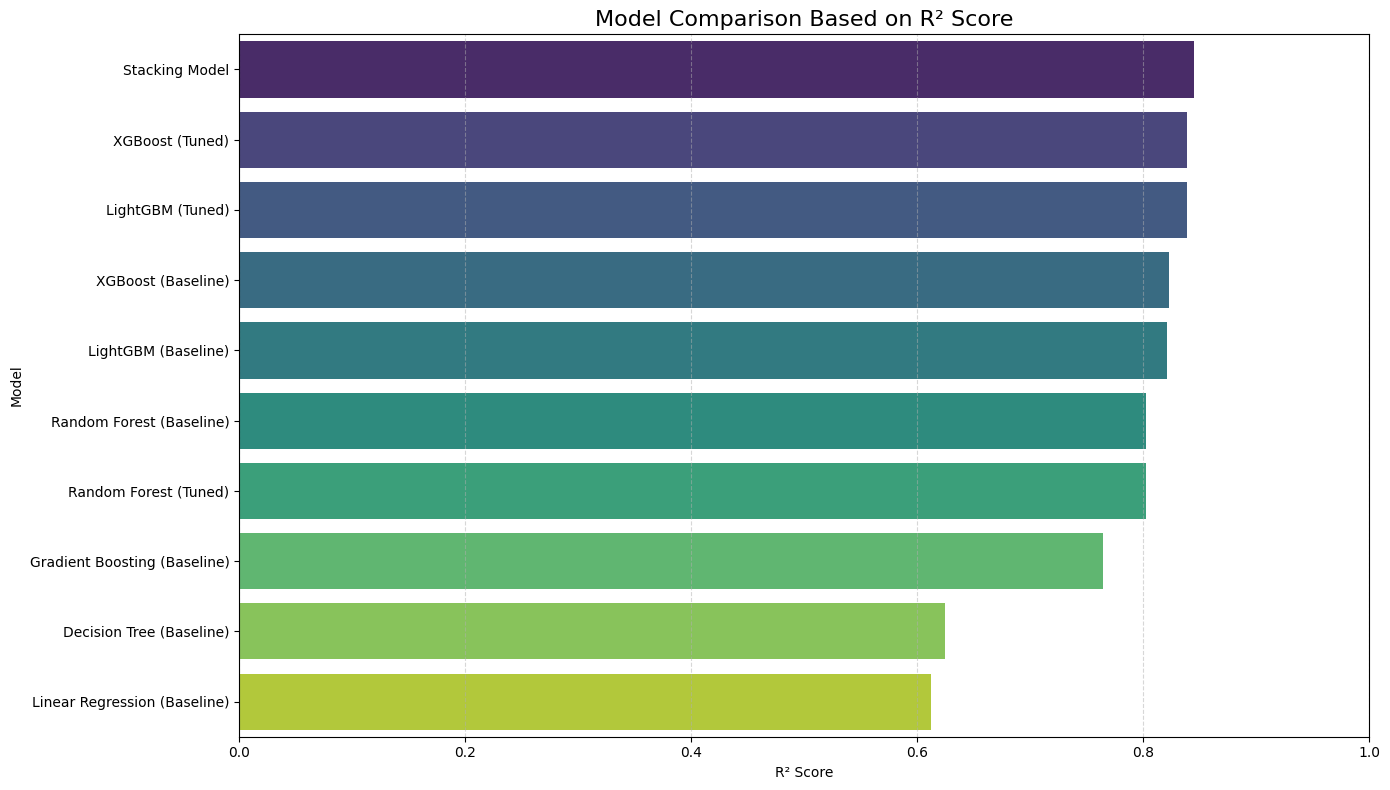

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for plotting
plot_df = final_df.reset_index().rename(columns={'index': 'Model'})

plt.figure(figsize=(14, 8))
sns.barplot(data=plot_df, x='R2', y='Model', palette='viridis')

plt.title("Model Comparison Based on R² Score", fontsize=16)
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This step implements Stacking, an advanced ensemble technique designed to improve prediction accuracy by combining multiple different models. Unlike "Bagging" (which uses the same type of model in parallel) or "Boosting" (which builds models sequentially), Stacking typically uses heterogeneous base learners—in this case, our tuned Random Forest, XGBoost, and LightGBM models.

The process works in two layers:


1. Base Layer: The base models make predictions on the data, effectively creating a "new training set" based on their outputs.

2. Meta Layer: A final meta-model (here, a Gradient Boosting Regressor) is trained on these predictions. It learns how to best weigh the strengths and correct the weaknesses of the base models to produce a final, superior prediction

# 1. Final Model Selection & Custom Preprocessing

Here, we lock in our best performing model (**Stacking Regressor**).

We also define a **Custom Preprocessor**. This is crucial for deployment. It ensures that any raw data sent to our app undergoes the exact same feature engineering (Log transforms, Ratios, One-Hot Encoding) as our training data.

In [33]:
# 1. Select best model
final_model = stack_model      # You got the best R2 here
print("Selected Final Model: Stacking Model")

# 2. Create Custom Preprocessor

from sklearn.base import BaseEstimator, TransformerMixin

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, log_cols, selected_features):
        self.log_cols = log_cols
        self.selected_features = selected_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Log transform
        for col in self.log_cols:
            if col in df.columns:
                df[col] = np.log1p(df[col])

        # Feature engineering
        df["rooms_per_household"] = df["total_rooms"] / df["households"]
        df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
        df["population_per_household"] = df["population"] / df["households"]

        # One-hot encoding for ocean_proximity
        df = pd.get_dummies(df, drop_first=True)

        # Keep only selected features
        df = df.reindex(columns=self.selected_features, fill_value=0)

        return df

Selected Final Model: Stacking Model


# 2. Building the Inference Pipeline

We bundle the preprocessor and the model into a single **scikit-learn Pipeline**.

This is the "Golden Object." When we save this, we save everything needed to make a prediction from scratch.

In [44]:
# 3. Create Pipeline (Preprocess + Model)
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("preprocess", CustomPreprocessor(cols_to_log, selected_features)),
    ("model", final_model)
])

# 4. Fit Pipeline on Training Data
# Target is already log-transformed (y_train_log)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 CustomPreprocessor(log_cols=['total_rooms', 'total_bedrooms',
                                              'population', 'households',
                                              'median_income',
                                              'median_house_value'],
                                    selected_features=['longitude', 'latitude',
                                                       'housing_median_age',
                                                       'total_rooms',
                                                       'total_bedrooms',
                                                       'population',
                                                       'households',
                                                       'median_income',
                                                       'ocean_proximity_INLAND',
                                                       'ocean_proximity_ISLAND',
                                                       'ocean_pro...
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=6,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=400,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...)),
                                               ('lgb',
                                                LGBMRegressor(n_estimators=400,
                                                              random_state=42))],
                                   final_estimator=GradientBoostingRegressor(),
                                   n_jobs=-1))])

# 3. Save and Test the Model

We use `joblib` to serialize the pipeline into a `.pkl` file.

We then verify it by reloading it and running a prediction on the Test set to ensure the R² score matches our expectations.

In [45]:
# 5. Save the full pipeline (only 1 file!)

import joblib

joblib.dump(pipeline, "final_house_model.pkl")
print("Model saved as final_house_model.pkl")

# 6. Load model later and predict

loaded_model = joblib.load("final_house_model.pkl")

# Example prediction using X_test
pred_log = loaded_model.predict(X_test)
pred_final = np.expm1(pred_log)

print("Example predictions:", pred_final[:5])

# Evaluate R2
from sklearn.metrics import r2_score

y_true = np.expm1(y_test)
print("R2 after loading:", r2_score(y_true, pred_final))

import os

os.listdir()


from google.colab import files
files.download("final_house_model.pkl")


from google.colab import files
uploaded = files.upload()

Model saved as final_house_model.pkl
Example predictions: [ 51653.26613967  74964.52462391 429935.55341744 255777.58789282
 264903.52934635]
R2 after loading: 0.8452679108150842


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

# 4. Create Streamlit App

We write a standalone Python script (`app.py`) that will serve as our web interface.

This script:
1. Loads the saved `.pkl` model.
2. Accepts user inputs (Rooms, Population, etc.).
3. Returns the predicted price in real-time.

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np

MODEL_PATH = "final_house_model.pkl"   # <-- works because file is uploaded

model = joblib.load(MODEL_PATH)

st.title("California Housing Price Prediction App")

# Input fields
median_income = st.number_input("Median Income")
total_rooms = st.number_input("Total Rooms")
total_bedrooms = st.number_input("Total Bedrooms")
population = st.number_input("Population")
households = st.number_input("Households")
ocean_proximity = st.selectbox("Ocean Proximity", ["INLAND", "NEAR OCEAN", "ISLAND", "NEAR BAY"])

if st.button("Predict Price"):
    # Create input DataFrame
    df = pd.DataFrame({
        "median_income": [median_income],
        "total_rooms": [total_rooms],
        "total_bedrooms": [total_bedrooms],
        "population": [population],
        "households": [households],
        "ocean_proximity": [ocean_proximity]
    })

    pred_log = model.predict(df)
    pred_final = np.expm1(pred_log)

    st.success(f"Predicted House Price: ${pred_final[0]:,.2f}")

# 5. Launch via Ngrok

Since this notebook runs on a remote cloud server (Colab), we use **Ngrok** to create a secure tunnel.

This generates a public URL (e.g., `https://xxxx.ngrok-free.app`) that allows you to interact with your Streamlit app from any browser.

In [ ]:
from pyngrok import ngrok

# Add your authtoken here
ngrok.set_auth_token("36LAqj3X5CDO8nIXc8XsHBpOUFS_7g3wqNTBkqKKrqDyqhFyf")


from pyngrok import ngrok

# Kill open tunnels
ngrok.kill()

# Start streamlit
public_url = ngrok.connect(port=8501)
print("Streamlit URL:", public_url)

!streamlit run app.py &>/dev/null&

# Conclusion

This project successfully built an end-to-end machine learning pipeline to predict housing prices in California based on 1990 census data. By systematically exploring data processing, model selection, and deployment, we achieved a robust solution capable of real-world interaction.

### Key Achievements:
* **Data Mastery:** We processed raw census data, handling skewed distributions (via log transformation) and engineering new features like `rooms_per_household` to capture deeper insights.
* **Rigorous Model Comparison:** We trained and evaluated six different regression algorithms, establishing **Linear Regression** as a baseline and identifying **XGBoost** and **LightGBM** as top performers.
* **Optimization:** Through **GridSearchCV**, we fine-tuned the hyperparameters of our best models, squeezing out extra performance.
* **Ensemble Power:** We implemented a **Stacking Regressor**, combining the strengths of Random Forest, XGBoost, and LightGBM into a single meta-model that outperformed any individual algorithm.
* **Deployment Ready:** We encapsulated the entire workflow (preprocessing + modeling) into a single `pipeline.pkl` file and built an interactive web application using **Streamlit**, making the model accessible to non-technical users via a public URL.

---

# Future Scope & Improvements

While the current model is effective, there are several avenues for future enhancement:

1.  **Modern Data Integration:** The current dataset is from 1990. Integrating recent housing data (e.g., from Zillow or Redfin) or adding external factors like interest rates and school district ratings would significantly improve real-world relevance.
2.  **Advanced Feature Engineering:**
    * **Geospatial Clustering:** Instead of just raw latitude/longitude, we could use K-Means clustering to group houses into specific "neighborhoods."
    * **Distance Metrics:** Calculating the distance to key amenities (beaches, city centers, universities) could add high-value predictive power.
3.  **Deep Learning:** For much larger datasets, experimenting with Neural Networks (using TensorFlow or PyTorch) could capture even more complex non-linear patterns.
4.  **Cloud Deployment:** Currently hosted via Ngrok (temporary), the next step is to deploy the app permanently using cloud services like **AWS EC2**, **Heroku**, or **Streamlit Cloud**.
5.  **Explainability:** Integrating SHAP (SHapley Additive exPlanations) values into the dashboard would allow users to understand *why* a house was priced a certain way (e.g., "The price is high mainly because of the ocean proximity").